##### 1. Loading the Data

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_json('preprocessed_stories.json')

# Display the first few rows
print(df.head())

          file_name                                  preprocessed_text
0  Files201_300.pdf  facebook urged address fake manipulated video ...
1  Files501_600.pdf  national security consideration likely ai sund...
2  Files700_801.pdf  coming past guest essay new york time january ...
3  Files501_600.pdf  industry insider drive open alternative big te...
4  Files101_200.pdf  hacker china russia others used openai system ...


##### 2. Basic Textual Data Exploration
Summary Statistics

In [15]:
# Summary statistics of dataset
print(df.info())

# Descriptive statistics of the text column
print(df['preprocessed_text'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file_name          500 non-null    object
 1   preprocessed_text  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None
count     500
unique    497
top          
freq        4
Name: preprocessed_text, dtype: object


Checking for Missing Values

In [16]:
print(df.isnull().sum())

file_name            0
preprocessed_text    0
dtype: int64


Distribution of Text Lengths

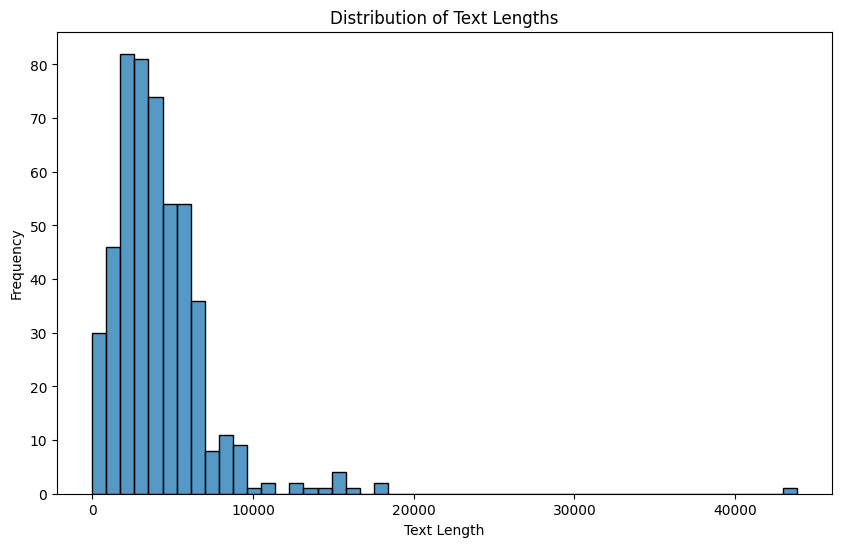

In [17]:
# Add a column for text length
df['text_length'] = df['preprocessed_text'].apply(len)

# Plot the distribution of text lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

##### 4. Visualizing Word Frequencies
Word Cloud

In [18]:
pip install pandas numpy matplotlib seaborn wordcloud 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


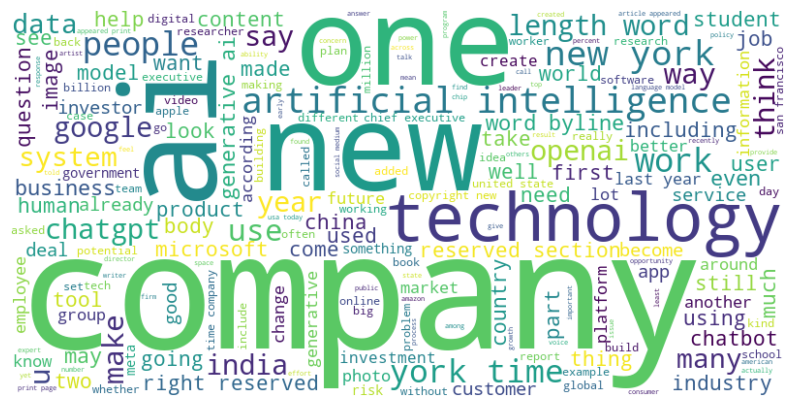

In [19]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_text']))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Bar Plot of Common Words

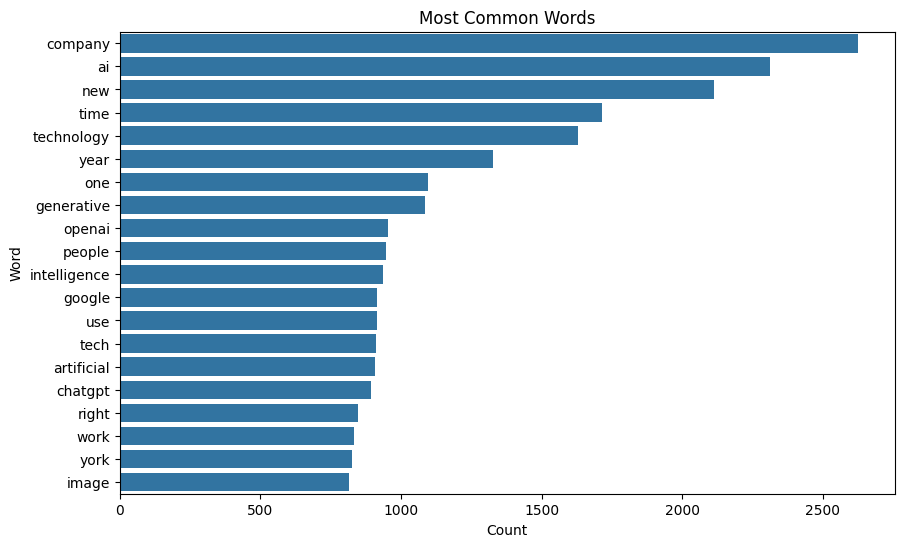

In [20]:
from collections import Counter

# Tokenize cleaned text
all_words = ' '.join(df['preprocessed_text']).split()

# Get the most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the common words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

##### 5. Sentiment Analysis

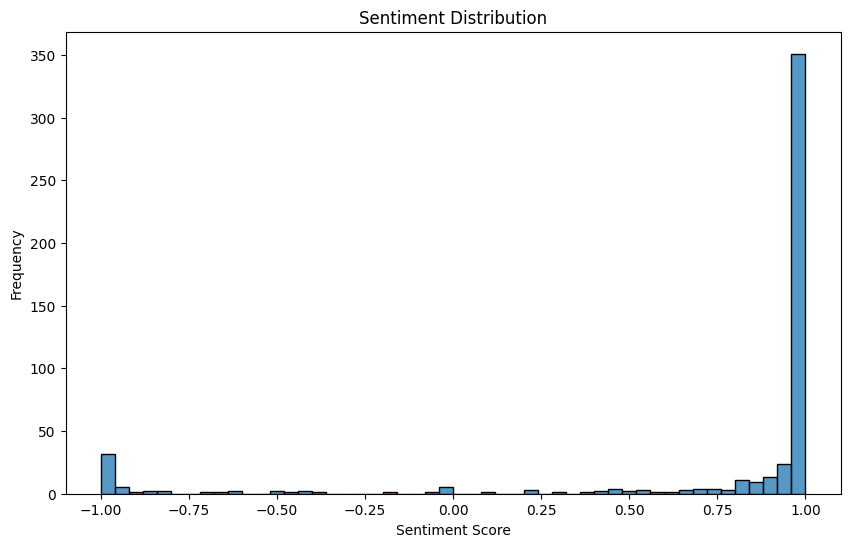

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
lexicon_score = "/Users/QuangAP/nltk_data/vader_lexicon/vader_lexicon.txt"

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer(lexicon_score)

# Compute sentiment scores
df['sentiment'] = df['preprocessed_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

##### 6. Topic Modeling

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['preprocessed_text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
for index, topic in enumerate(lda.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

TOP 10 WORDS FOR TOPIC #0
['technology', 'work', 'student', 'way', 'think', 'people', 'openai', 'time', 'new', 'chatgpt']


TOP 10 WORDS FOR TOPIC #1
['content', 'data', 'tool', 'use', 'time', 'company', 'technology', 'new', 'image', 'ai']


TOP 10 WORDS FOR TOPIC #2
['actor', 'deal', 'billion', 'york', 'apple', 'year', 'china', 'time', 'new', 'company']


TOP 10 WORDS FOR TOPIC #3
['model', 'microsoft', 'google', 'new', 'year', 'tech', 'india', 'technology', 'ai', 'company']


TOP 10 WORDS FOR TOPIC #4
['people', 'growth', 'time', 'technology', 'ai', 'right', 'year', 'think', 'company', 'india']


